In [1]:
from __future__ import division
import matplotlib.pyplot as plt
from matplotlib import transforms
from matplotlib import rc
from IPython.display import Image
import numpy as np
from astropy.io import fits as pyfits
from astropy.time import Time
import sys,os,glob
from astropy.io import fits
import matplotlib.cm as cm
import pylab as pl
import re
import math

In [2]:
m4_results=np.genfromtxt('m4_simulations/Final_results/CTA_S_pl_5hr_sigma.txt',dtype='str')
m4_source_name=[]
m4_sigma=[]
m4_sigma_err=[]
m4_detected_sources=[]

for i in range(len(m4_results)):
    if(float(m4_results[i][1])<=1000):
        m4_source_name.append(m4_results[i][0])
        m4_sigma.append(float(m4_results[i][1]))
        m4_sigma_err.append(float(m4_results[i][2]))
#print (np.max(sigma))
m4_detections=0
m4_non_detections=0
for i in range(len(m4_source_name)):
    if(m4_sigma[i]+ m4_sigma_err[i]>=5):
        #print (m4_source_name[i],m4_sigma[i])
        m4_detected_sources.append(m4_source_name[i])
        m4_detections=m4_detections+1
    if(m4_sigma[i]+ m4_sigma_err[i]<5):
        m4_non_detections=m4_non_detections+1
    if(m4_sigma[i]==np.max(m4_sigma)):
        print ('Brightest M4 source:',m4_source_name[i])
#print (m4_detections)

Brightest M4 source: J2158.8-3013


In [3]:
f4_results=np.genfromtxt('f4_simulations/Final_results/CTA_S_pl_5hr_sigma.txt',dtype='str')
f4_source_name=[]
f4_sigma=[]
f4_sigma_err=[]
f4_detected_sources=[]
for i in range(len(f4_results)):
    if(float(f4_results[i][1])<=1000):
        f4_source_name.append(f4_results[i][0])
        f4_sigma.append(float(f4_results[i][1]))
        f4_sigma_err.append(float(f4_results[i][2]))
#print (np.max(sigma))
f4_detections=0
for i in range(len(f4_source_name)):
    if(f4_sigma[i]+f4_sigma_err[i]>=5):
        #print (f4_source_name[i],f4_sigma[i])
        f4_detected_sources.append(f4_source_name[i])
        f4_detections=f4_detections+1
    if(f4_sigma[i]==np.max(f4_sigma)):
        print ('Brightest F4 source:',f4_source_name[i])
#print (f4_detections)

Brightest F4 source: J2158.8-3013


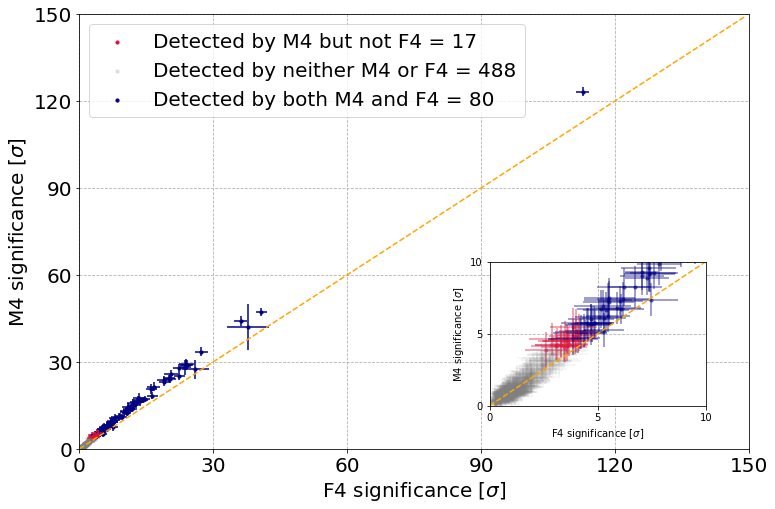

<Figure size 864x576 with 0 Axes>

In [4]:
x=np.arange(0,150,1)
c=0
d=0
e=0
extra_sources=[]
extra_m4_sigma=[]
ssize=10
sigma_ratio=[]

fig, ax1 =plt.subplots(figsize=(12, 8))
for i in range(len(m4_source_name)):
    for j in range(len(f4_source_name)):
        if(m4_source_name[i]==f4_source_name[j] and f4_sigma[j]+f4_sigma_err[j]>=5 and m4_sigma[i]+m4_sigma_err[i]>=5):
            ax1.scatter(f4_sigma[j],m4_sigma[i],s=ssize,color='navy')
            ax1.errorbar(f4_sigma[j],m4_sigma[i],xerr=f4_sigma_err[j],yerr=m4_sigma_err[i],color='navy')
            sigma_ratio.append(m4_sigma[i]/f4_sigma[j])
            if(c==0):
                ax1.scatter(f4_sigma[j],m4_sigma[i],color='navy',s=ssize,label='Detected by both M4 and F4 = %i'%f4_detections)
                c=c+1
        if(m4_source_name[i]==f4_source_name[j] and f4_sigma[j]+f4_sigma_err[j]<5 and m4_sigma[i]+m4_sigma_err[i]>=5):
            extra_sources.append(m4_source_name[i])
            extra_m4_sigma.append(m4_sigma[i])
            ax1.errorbar(f4_sigma[j],m4_sigma[i],xerr=f4_sigma_err[j],yerr=m4_sigma_err[i],color='crimson')
            ax1.scatter(f4_sigma[j],m4_sigma[i],s=ssize,color='crimson')
            sigma_ratio.append(m4_sigma[i]/f4_sigma[j])
            if(d==0):
                ax1.scatter(f4_sigma[j],m4_sigma[i],color='crimson',s=ssize,label='Detected by M4 but not F4 = %i'%(m4_detections-f4_detections))
                d=d+1
                sigma_ratio.append(m4_sigma[i]/f4_sigma[j])
        if(m4_source_name[i]==f4_source_name[j] and f4_sigma[j]+f4_sigma_err[j]<5 and m4_sigma[i]+m4_sigma_err[i]<5):
            ax1.scatter(f4_sigma[j],m4_sigma[i],color='gray',s=ssize,alpha=0.2)
            ax1.errorbar(f4_sigma[j],m4_sigma[i],xerr=f4_sigma_err[j],yerr=m4_sigma_err[i],color='gray',alpha=0.2)
            sigma_ratio.append(m4_sigma[i]/f4_sigma[j])
            if(e==0):
                ax1.scatter(f4_sigma[j],m4_sigma[i],color='gray',alpha=0.2,s=ssize,label='Detected by neither M4 or F4 = %i'%m4_non_detections)
                e=e+1
                

ax1.plot(x,x,color='orange',ls='--')
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax1.set_yticks(fontsize=20, rotation=0)
ax1.set_yticks(np.arange(0,151, 30))
ax1.set_xticks(np.arange(0,151, 30))
ax1.grid(linestyle='--')
ax1.set_xlabel(r'F4 significance [$\sigma$]',fontsize=20)
ax1.set_ylabel(r'M4 significance [$\sigma$]',fontsize=20)
ax1.set_xlim([0,150])
ax1.set_ylim([0,150])
ax1.legend(fontsize=20)

left, bottom, width, height = [0.6, 0.2, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

x=np.arange(0,150,1)
plt.figure(figsize=(12, 8))
for i in range(len(m4_source_name)):
    for j in range(len(f4_source_name)):
        if(m4_source_name[i]==f4_source_name[j] and f4_sigma[j]+f4_sigma_err[j]>=5 and m4_sigma[i]+m4_sigma_err[i]>=5):
            ax2.scatter(f4_sigma[j],m4_sigma[i],color='navy',s=ssize,alpha=0.5)
            ax2.errorbar(f4_sigma[j],m4_sigma[i],xerr=f4_sigma_err[j],yerr=m4_sigma_err[i],color='navy',alpha=0.5)
            
        if(m4_source_name[i]==f4_source_name[j] and f4_sigma[j]+f4_sigma_err[j]<5 and m4_sigma[i]+m4_sigma_err[i]>=5):
            ax2.scatter(f4_sigma[j],m4_sigma[i],color='crimson',s=ssize,alpha=0.5)
            ax2.errorbar(f4_sigma[j],m4_sigma[i],xerr=f4_sigma_err[j],yerr=m4_sigma_err[i],color='crimson',alpha=0.5)
            
        if(m4_source_name[i]==f4_source_name[j] and f4_sigma[j]+f4_sigma_err[j]<5 and m4_sigma[i]+m4_sigma_err[i]<5):
            ax2.scatter(f4_sigma[j],m4_sigma[i],color='gray',s=ssize,alpha=0.1)
            ax2.errorbar(f4_sigma[j],m4_sigma[i],xerr=f4_sigma_err[j],yerr=m4_sigma_err[i],color='gray',alpha=0.1)

            
ax2.plot(x,x,color='orange',ls='--')
ax2.tick_params(axis='both', which='major', labelsize=10)
#ax1.set_yticks(fontsize=20, rotation=0)
ax2.set_yticks(np.arange(0,11, 5))
ax2.set_xticks(np.arange(0,11, 5))
ax2.grid(linestyle='--')
ax2.set_xlabel(r'F4 significance [$\sigma$]',fontsize=10)
ax2.set_ylabel(r'M4 significance [$\sigma$]',fontsize=10)
ax2.set_xlim([0,10])
ax2.set_ylim([0,10])

fig.savefig('sigma_comparison.pdf',dpi=100)
#plt.show()

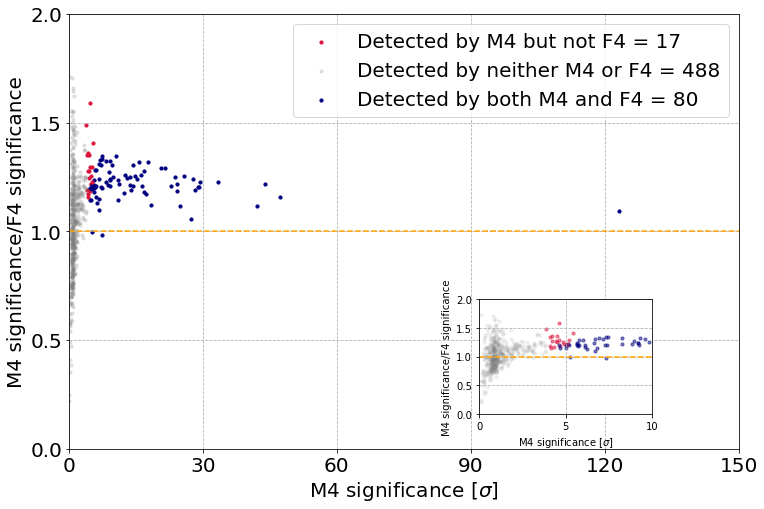

<Figure size 864x576 with 0 Axes>

In [5]:
x=np.arange(0,150,1)
c=0
d=0
e=0
extra_sources=[]
extra_m4_sigma=[]
ssize=10
sigma_ratio=[]

fig, ax1 =plt.subplots(figsize=(12, 8))
for i in range(len(m4_source_name)):
    for j in range(len(f4_source_name)):
        if(m4_source_name[i]==f4_source_name[j] and f4_sigma[j]+f4_sigma_err[j]>=5 and m4_sigma[i]+m4_sigma_err[i]>=5):
            ax1.scatter(m4_sigma[i],m4_sigma[i]/f4_sigma[j],s=ssize,color='navy')
            #ax1.errorbar(f4_sigma[j],m4_sigma[i],xerr=f4_sigma_err[j],yerr=m4_sigma_err[i],color='navy')
            sigma_ratio.append(m4_sigma[i]/f4_sigma[j])
            if(c==0):
                ax1.scatter(m4_sigma[i],m4_sigma[i]/f4_sigma[j],color='navy',s=ssize,label='Detected by both M4 and F4 = %i'%f4_detections)
                c=c+1
        if(m4_source_name[i]==f4_source_name[j] and f4_sigma[j]+f4_sigma_err[j]<5 and m4_sigma[i]+m4_sigma_err[i]>=5):
            extra_sources.append(m4_source_name[i])
            extra_m4_sigma.append(m4_sigma[i])
            #ax1.errorbar(f4_sigma[j],m4_sigma[i],xerr=f4_sigma_err[j],yerr=m4_sigma_err[i],color='crimson')
            ax1.scatter(m4_sigma[i],m4_sigma[i]/f4_sigma[j],s=ssize,color='crimson')
            sigma_ratio.append(m4_sigma[i]/f4_sigma[j])
            if(d==0):
                ax1.scatter(m4_sigma[i],m4_sigma[i]/f4_sigma[j],color='crimson',s=ssize,label='Detected by M4 but not F4 = %i'%(m4_detections-f4_detections))
                d=d+1
                sigma_ratio.append(m4_sigma[i]/f4_sigma[j])
        if(m4_source_name[i]==f4_source_name[j] and f4_sigma[j]+f4_sigma_err[j]<5 and m4_sigma[i]+m4_sigma_err[i]<5):
            ax1.scatter(m4_sigma[i],m4_sigma[i]/f4_sigma[j],color='gray',s=ssize,alpha=0.2)
            #ax1.errorbar(f4_sigma[j],m4_sigma[i],xerr=f4_sigma_err[j],yerr=m4_sigma_err[i],color='gray',alpha=0.2)
            sigma_ratio.append(m4_sigma[i]/f4_sigma[j])
            if(e==0):
                ax1.scatter(m4_sigma[i],m4_sigma[i]/f4_sigma[j],color='gray',alpha=0.2,s=ssize,label='Detected by neither M4 or F4 = %i'%m4_non_detections)
                e=e+1
                

#ax1.plot(x,x,color='orange',ls='--')
ax1.axhline(y=1, color='orange', linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax1.set_yticks(fontsize=20, rotation=0)
ax1.set_yticks(np.arange(0,2.1, 0.5))
ax1.set_xticks(np.arange(0,151, 30))
ax1.grid(linestyle='--')
ax1.set_xlabel(r'M4 significance [$\sigma$]',fontsize=20)
ax1.set_ylabel(r'M4 significance/F4 significance',fontsize=20)
ax1.set_ylim([0,2])
ax1.set_xlim([0,150])
ax1.legend(fontsize=20)

left, bottom, width, height = [0.6, 0.185, 0.20, 0.20]
ax2 = fig.add_axes([left, bottom, width, height])

x=np.arange(0,150,1)
plt.figure(figsize=(12, 8))
for i in range(len(m4_source_name)):
    for j in range(len(f4_source_name)):
        if(m4_source_name[i]==f4_source_name[j] and f4_sigma[j]+f4_sigma_err[j]>=5 and m4_sigma[i]+m4_sigma_err[i]>=5):
            ax2.scatter(m4_sigma[i],m4_sigma[i]/f4_sigma[j],color='navy',s=ssize,alpha=0.5)
            #ax2.errorbar(f4_sigma[j],m4_sigma[i],xerr=f4_sigma_err[j],yerr=m4_sigma_err[i],color='navy',alpha=0.5)
            
        if(m4_source_name[i]==f4_source_name[j] and f4_sigma[j]+f4_sigma_err[j]<5 and m4_sigma[i]+m4_sigma_err[i]>=5):
            ax2.scatter(m4_sigma[i],m4_sigma[i]/f4_sigma[j],color='crimson',s=ssize,alpha=0.5)
            #ax2.errorbar(f4_sigma[j],m4_sigma[i],xerr=f4_sigma_err[j],yerr=m4_sigma_err[i],color='crimson',alpha=0.5)
            
        if(m4_source_name[i]==f4_source_name[j] and f4_sigma[j]+f4_sigma_err[j]<5 and m4_sigma[i]+m4_sigma_err[i]<5):
            ax2.scatter(m4_sigma[i],m4_sigma[i]/f4_sigma[j],color='gray',s=ssize,alpha=0.1)
            #ax2.errorbar(f4_sigma[j],m4_sigma[i],xerr=f4_sigma_err[j],yerr=m4_sigma_err[i],color='gray',alpha=0.1)

            
#ax2.plot(x,x,color='orange',ls='--')
ax2.axhline(y=1, color='orange', linestyle='--')
ax2.tick_params(axis='both', which='major', labelsize=10)
#ax1.set_yticks(fontsize=20, rotation=0)
ax2.set_yticks(np.arange(0,2.1, 0.5))
ax2.set_xticks(np.arange(0,11, 5))
ax2.grid(linestyle='--')
ax2.set_xlabel(r'M4 significance [$\sigma$]',fontsize=10)
ax2.set_ylabel(r'M4 significance/F4 significance',fontsize=10)
ax2.set_ylim([0,2])
ax2.set_xlim([0,10])

fig.savefig('sigma_comparison2.pdf',dpi=100)
#plt.show()


In [6]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

hdul = fits.open('f4_simulations/gll_psc_v27.fit')
data = hdul[1].data
#print (data)

name=[]
source_type=[]
tevcat=[]
common_name=[]
fermi_significance=[]

for i in range(len(data)):
    name.append(data[i][0])
    fermi_significance.append(data[i][13])
    common_name.append(data[i][-8])
    source_type.append(data[i][-10])
    tevcat.append(data[i][-12])

In [7]:
detected_type=[]
detected_common_name=[]
detected_tevcat=[]

for i in range(len(m4_detected_sources)):
    for j in range(len(name)):
        if(similar(('4FGL '+m4_detected_sources[i]),name[j])>0.95):
            #print (name[j])
            detected_type.append(source_type[j])
            detected_common_name.append(common_name[j])
            detected_tevcat.append(tevcat[j])


In [8]:
#print ((detected_type))
bll=0
fsrq=0
bcu=0
rdg=0
for i in range(len(detected_type)):
    if(detected_type[i]=='bll' or detected_type[i]=='BLL'):
        bll=bll+1
    elif(detected_type[i]=='fsrq' or detected_type[i]=='FSRQ'):
        fsrq=fsrq+1
    elif(detected_type[i]=='bcu' or detected_type[i]=='BCU'):
        bcu=bcu+1
    elif(detected_type[i]=='rdg' or detected_type[i]=='RDG'):
        rdg=rdg+1
    else:
        print ('None of the above')
        print (detected_type[i])
print ('Number of sources:',len(detected_type))
print ('Number of BL Lacs:',bll)
print ('Number of FSRQs:',fsrq)
print ('Number of BCUs:',bcu)
print ('Number of Radio Galaxies:',rdg)

new_vhe_source=0
for i in range(len(detected_tevcat)):
    if(detected_tevcat[i]=='N'):
        new_vhe_source=new_vhe_source+1
print ('Number of New VHE sources:',new_vhe_source)

Number of sources: 97
Number of BL Lacs: 75
Number of FSRQs: 4
Number of BCUs: 14
Number of Radio Galaxies: 4
Number of New VHE sources: 79


In [9]:
sorting_data=[]
sorting_data=np.array(m4_sigma)
top_ten_index=sorting_data.argsort()[-10:]
top_ten_sigma=[]
top_ten_names=[]
for i in range(len(top_ten_index)):
    top_ten_sigma.append(m4_sigma[top_ten_index[i]])
    top_ten_names.append(m4_source_name[top_ten_index[i]])

In [10]:
final_type=[]
final_common_name=[]
final_tevcat=[]
for i in range(len(top_ten_names)):
    for j in range(len(name)):
        if(similar(('4FGL '+top_ten_names[i]),name[j])>0.95):
            #print (name[j])
            final_type.append(source_type[j])
            final_common_name.append(common_name[j])
            final_tevcat.append(tevcat[j])

In [11]:
print (len(final_common_name))

10


In [12]:
#print (final_common_name)
#print (final_tevcat)
print ('Name', 'Common Name', 'Significance', 'Type', 'Detected by IACTs')
for i in range(len(top_ten_names)):
    print (top_ten_names[i],final_common_name[i],"%.1f" %top_ten_sigma[i],final_type[i],final_tevcat[i])

Name Common Name Significance Type Detected by IACTs
J1315.0-4236 MS 13121-4221 27.7 bll P
J1517.7-2422 AP Librae 28.2 bll P
J1958.3-3010 1RXS J195815.6-301119 28.9 bll N
J0640.0-1253 TXS 0637-128 29.1 bll N
J1256.2-1146 PMN J1256-1146 29.4 bll N
J0847.0-2336 PMN J0847-2337 33.5 bcu N
J2009.4-4849 PKS 2005-489 42.2 BLL P
J0627.0-3529 PKS 0625-35 43.9 rdg P
J1917.7-1921 1H 1914-194 47.2 bll N
J2158.8-3013 PKS 2155-304 123.2 bll P


In [13]:
#print (extra_sources)
extra_type=[]
extra_common_name=[]
extra_tevcat=[]
for i in range(len(extra_sources)):
    for j in range(len(name)):
        if(similar(('4FGL '+extra_sources[i]),name[j])>0.95):
            extra_type.append(source_type[j])
            extra_common_name.append(common_name[j])
            extra_tevcat.append(tevcat[j])

In [14]:
print ('Name', 'Common Name', 'Mean Significance', 'Type', 'Detected by IACTs')
for i in range(len(extra_sources)):
    print (extra_sources[i],extra_common_name[i],"%.1f" %extra_m4_sigma[i],extra_type[i],extra_tevcat[i])#

Name Common Name Mean Significance Type Detected by IACTs
J2014.3-0047 PMN J2014-0047 4.9 bll N
J2049.7-0036 1RXS J204921.6-003930 4.1 bll N
J2030.5-1439 NVSS J203028-143918 4.1 fsrq N
J0305.1-1608 PKS 0302-16 4.6 bll N
J2058.8-1442 TXS 2056-149 4.7 bcu N
J1121.3-0011 MGC 0019706 5.2 bcu N
J2108.7-0250 TXS 2106-030 4.5 bll N
J0154.3-0236 TXS 0151-028 4.5 bcu N
J1133.8-2048 NVSS J113350-204852 4.8 bll N
J0956.5-0958 1RXS J095627.2-095720 4.5 bll N
J0009.7-3217 IC 1531 4.6 rdg N
J0138.5-4613 PMN J0138-4614 4.2 bcu N
J2227.9-3031 PKS 2225-308 5.4 rdg N
J0307.8-0419 LEDA 095522 3.9 bcu N
J1219.7-0313 1RXS J121946.0-031419 4.2 bll N
J1512.1-2255 1RXS J151213.1-225515 4.3 bll N
J0238.1-3905 1RXS J023800.5-390505 4.2 bll N
J2250.4-4206 PMN J2250-4206 5.1 bll N


In [15]:
data = np.genfromtxt('f4_simulations/agn_pop_4lac_dr2_with_z.dat', dtype='str')  # insert
all_Source_Name = []
all_RAJ2000 = []
all_DECJ2000 = []
all_Redshift = []

cta_north_lat = 28.71
cta_south_lat = -24.63


for i in range(1, len(data)):
        all_Source_Name.append(data[i][0])
        all_RAJ2000.append(float(data[i][1]))
        all_DECJ2000.append(float(data[i][2]))
        all_Redshift.append(float(data[i][3]))


In [16]:
#print (len(m4_detected_sources))
#print (len(f4_detected_sources))
m4_z=[]
for i in range(len(m4_detected_sources)):
    for j in range(len(all_Source_Name)):
        if(m4_detected_sources[i]==all_Source_Name[j]):
            m4_z.append(all_Redshift[j])
f4_z=[]
for i in range(len(f4_detected_sources)):
    for j in range(len(all_Source_Name)):
        if(f4_detected_sources[i]==all_Source_Name[j]):
            f4_z.append(all_Redshift[j])

In [17]:
#print (len(m4_z))
#print (len(f4_z))

97
80


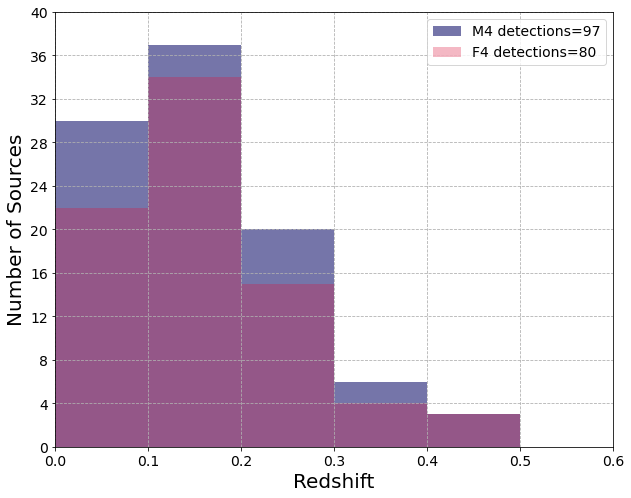

In [18]:
fig=plt.figure(figsize=(10,8))
plt.hist(m4_z, bins=np.arange(0,0.6,0.1), fill=True,color='midnightblue',alpha=0.6,label="M4 detections=%s"%(len(m4_z)))              
plt.hist(f4_z, bins=np.arange(0,0.6,0.1), fill=True,color='crimson',alpha=0.3,label="F4 detections=%s"%(len(f4_z))) 
plt.ylabel('Number of Sources', fontsize=20)
plt.xlabel('Redshift', fontsize=20)
plt.yticks(np.arange(0,41,4))
plt.xlim([0,0.6])
plt.ylim([0,40])
plt.grid(ls='--')
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.legend(fontsize=14)
plt.savefig('z_distribution.pdf',dpi=100)
#plt.show()